In [2]:
import os
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

FILE_NAME = "../data/raw_data/origin_data.csv"
SAVE_DIR = "../data/"

def stratified_choice_train_test_split(X, test_size=0.2, random_state=42):
  """ 라벨별로 일정 비율로 추출합니다 (ruw_label_to_num.pkl 경로 확인 필수)"""
  split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
  for train_idx, test_idx in split.split(X, X["category"]):
      X_train = X.iloc[train_idx]
      X_test = X.iloc[test_idx]
  return X_train, X_test

pd_dataset = pd.read_csv(FILE_NAME)
pd_train, pd_test = stratified_choice_train_test_split(pd_dataset, test_size=0.1, random_state=42)
pd_train, pd_validation = stratified_choice_train_test_split(pd_train, test_size=0.1, random_state=42)
if not os.path.exists(SAVE_DIR):
    os.mkdir(SAVE_DIR)
pd_train["id"] = list(range(len(pd_train)))
pd_validation["id"] = list(range(len(pd_train),len(pd_train)+len(pd_validation)))
pd_test["id"] = list(range(len(pd_train)+len(pd_validation),len(pd_train)+len(pd_validation)+len(pd_test)))
pd_train["context"] = pd_train["context"].astype(str)
pd_train["question"] = pd_train["question"].astype(str)
pd_train["id"] = pd_train["id"].astype(str)
pd_validation["context"] = pd_validation["context"].astype(str)
pd_validation["question"] = pd_validation["question"].astype(str)
pd_validation["id"] = pd_validation["id"].astype(str)
pd_test["context"] = pd_test["context"].astype(str)
pd_test["question"] = pd_test["question"].astype(str)
pd_test["id"] = pd_test["id"].astype(str)
pd_train.to_csv(os.path.join(SAVE_DIR, "train.csv"), index=False)
pd_validation.to_csv(os.path.join(SAVE_DIR,"validation.csv"), index=False)
pd_test.to_csv(os.path.join(SAVE_DIR, "test.csv"), index=False)

print("========== train test split 완료 ==========")

========== train test split 완료 ==========


/tmp/ipykernel_5693/161019503.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_test["id"] = list(range(len(pd_train)+len(pd_validation),len(pd_train)+len(pd_validation)+len(pd_test)))
/tmp/ipykernel_5693/161019503.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_test["context"] = pd_test["context"].astype(str)
/tmp/ipykernel_5693/161019503.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



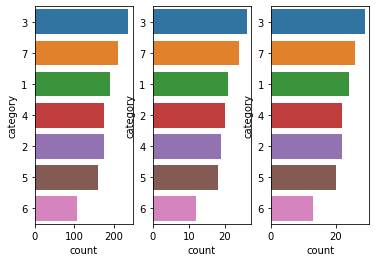

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(1, 4):
    axes = fig.add_subplot(1, 3, i)
    if i == 1:
        sns.countplot(y='category', data=pd_train, order=pd_train['category'].value_counts().index)
    elif i==2:
        sns.countplot(y='category', data=pd_validation, order=pd_validation['category'].value_counts().index)
    else:
        sns.countplot(y='category', data=pd_test, order=pd_test['category'].value_counts().index)


In [41]:
pd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     1553 non-null   int64 
 1   document_id  1553 non-null   int64 
 2   question     1552 non-null   object
 3   answers      1553 non-null   object
 4   context      1553 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.8+ KB


In [7]:
for i in range(len(pd_train)):
    if type((pd_train.iloc[i]["context"])) != str:
        print(i)
    if type(pd_train.iloc[i]["question"]) != str:
        print(i)

In [20]:
import json
with open("/opt/ml/input/data/wikipedia_documents.json","rb") as f:
    wiki = json.load(f)

In [23]:
print(wiki["0"])

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.', 'corpus_source': '위키피디아', 'url': 'TODO', 'domain': None, 'title': '나라 목록', 'author': None, 'html': None, 'document_id': 0}


In [36]:
from tqdm import tqdm
meeting_contexts = {}
for i in tqdm(range(len(pd_test))):
    dict_temp = {
        'text': pd_test.iloc[i]['context'],
        'document_id': str(pd_test.iloc[i]['document_id']),
        'corpus_source': None, 
        'url': 'TODO', 
        'domain': None, 
        'title': f"회의 # {pd_test.iloc[i]['document_id']}", 
        'author': None, 
        'html': None,
    }
    meeting_contexts[str(i)] = dict_temp

100%|██████████| 156/156 [00:00<00:00, 2856.83it/s]


In [ ]:
str(meeting_contexts)

In [38]:
import json
print(type(meeting_contexts))
with open('meeting_collection.json', 'r', encoding='utf-8') as f:
    meeting_contexts = json.load(f)

<class 'dict'>


In [39]:
meeting_contexts.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155'])

In [46]:
querys = pd_test[["question","id"]]

In [50]:
new_pd_test = pd.DataFrame(querys)
print(new_pd_test)
new_pd_test.to_csv(os.path.join(SAVE_DIR, "test.csv"), index=False)

                                               question    id
482                       제245회 완주군의회 임시회 회기는 언제로 결정됐어?  1397
121               제92회 완주군의회 임시회 회의록의 서명의원을 선출한 회의는 뭐야?  1398
989                     완주군에서 가부채경감특별법의 제정을 건의한 날은 언제야?  1399
1103                2006년 제1회 추가경정예산안을 편성하고자 하는 이유는 뭐야?  1400
55                       제70회 전라북도 완주군의회에서 휴회하는 이유가 뭐야?  1401
...                                                 ...   ...
99    제241회 완주군의회 임시회에서 운영위원회 협의 및 의원 간담회를 통해 협의를 한 ...  1548
1409        2007회계연도세입세출결산검사위원선임의 건을 다루고 있는 회의는 무슨 회의지?  1549
1450            2002년도 완주군 행정사무감사 계획서에 대해 보고하는 사람은 누구지?  1550
954       제148회 전라북도 완주군의회 임시회 제1호 본회의에서 보고를 한 사람은 누구야?  1551
251                    184회 의회에서 행정사무감사 특별위원회 위원장은 누구야?  1552

[156 rows x 2 columns]


In [43]:
from datasets import load_from_disk
dataset = load_from_disk("/opt/ml/input/data/test_dataset")
print(dataset["validation"][0])

{'question': "유령'은 어느 행성에서 지구로 왔는가?", 'id': 'mrc-1-000653'}
